In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os

from pysteps.visualization import get_colormap
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


from pincast_verif.io_tools import load_observations, load_predictions, get_hdf5_metadata

In [3]:
DATA_FOLDER = Path("../data")
OUTPUT_FOLDER = Path("../data/figures/example_radar")
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

deuce_db_path = DATA_FOLDER / "deuce_nowcasts" / "deuce-raw.hdf5"
obs_db_path = DATA_FOLDER / "baseline_nowcasts" / "measurements.hdf5"

case = "2021-08-21 15:20:00"

bcnn_meta = get_hdf5_metadata(deuce_db_path)
obs_meta = get_hdf5_metadata(obs_db_path)

bcnn_nc = load_predictions(
    deuce_db_path, case, bcnn_meta["leadtimes"],bcnn_meta["method_name"]
)

obs = load_observations(
    obs_db_path, case, bcnn_meta["leadtimes"],obs_meta["method_name"]
)
inputs = load_observations(
    obs_db_path, case, range(-12,0),obs_meta["method_name"]
)

In [10]:
inputs.shape

(12, 512, 512)

In [5]:
bcnn_nc.shape

(12, 48, 512, 512, 2)

In [6]:
cmap,norm,_,_ = get_colormap("intensity",units="dBZ")

## Combined preds

In [7]:
y_ens, sd_al_ens = np.split(bcnn_nc,2,-1)
sd_al_ens += 32.0
var_al_ens = sd_al_ens**2
y_mean = y_ens.mean(axis=1)
var_ep = y_ens.var(axis=1)
var_al = var_al_ens.mean(axis=1)
var_pred = var_al + var_ep

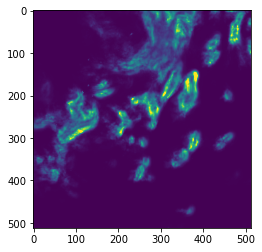

In [8]:
plt.imshow(var_ep[11], vmin=0, vmax=20)

## Observations, inputs

In [11]:
for i, img in enumerate(inputs):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.tight_layout()
    fig.patch.set_edgecolor('black')  
    fig.patch.set_facecolor('white')
    fig.patch.set_linewidth('2')  
    fig.savefig(OUTPUT_FOLDER / f"input_{i}.png", bbox_inches='tight', pad_inches=0.01, dpi=300, transparent=False)
    plt.close()

In [12]:
for i, img in enumerate(obs):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.tight_layout()
    fig.patch.set_edgecolor('black')  
    fig.patch.set_facecolor('white')
    fig.patch.set_linewidth('2')  
    fig.savefig(OUTPUT_FOLDER / f"obs_{i}.png", bbox_inches='tight', pad_inches=0.01, dpi=300, transparent=False)
    plt.close()

In [13]:
for i, nc in enumerate(y_mean):
    fig, ax = plt.subplots()
    ax.imshow(nc, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.tight_layout()
    fig.patch.set_edgecolor('black')  
    fig.patch.set_facecolor('white')
    fig.patch.set_linewidth('2')  
    fig.savefig(OUTPUT_FOLDER / f"mean_{i}.png", bbox_inches='tight', pad_inches=0.01, dpi=300, transparent=False)
    plt.close()

In [14]:
for i, nc in enumerate(np.sqrt(var_ep)):
    fig, ax = plt.subplots()
    ax.imshow(nc, cmap=matplotlib.cm.plasma, vmin=0.0, vmax=20*1)
    plt.axis('off')
    plt.tight_layout()
    fig.patch.set_edgecolor('black')  
    fig.patch.set_facecolor('white')
    fig.patch.set_linewidth('2')  
    fig.savefig(OUTPUT_FOLDER / f"ep_{i}.png", bbox_inches='tight', pad_inches=0.01, dpi=300, transparent=False)
    plt.close()

In [16]:
for i, nc in enumerate(np.sqrt(var_al)):
    fig, ax = plt.subplots()
    ax.imshow(nc, cmap=matplotlib.cm.plasma, vmin=0.0, vmax=20*1)
    plt.axis('off')
    plt.tight_layout()
    fig.patch.set_edgecolor('black')  
    fig.patch.set_facecolor('white')
    fig.patch.set_linewidth('2')  
    fig.savefig(OUTPUT_FOLDER / f"al_{i}.png", bbox_inches='tight', pad_inches=0.01, dpi=300, transparent=False)
    plt.close()